<a href="https://colab.research.google.com/github/sidms24/internship/blob/main/week%205/Embedding%20Project/data_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip -q install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 32.2 MB/s eta 0:00:00


In [52]:
import torch
import torch.nn as nn
import Bio
from Bio import SeqIO
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
!gunzip sequences_h1.fasta.gz

In [2]:
def one_hot_encode(seq,max_length = 2366):
    mapping = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], "T": [0, 0, 0, 1]}
    one_hot = [mapping.get(base, [0, 0, 0, 0]) for base in seq]

    # 2. Calculate the amount of padding needed
    padding_needed = max_length - len(one_hot)

    # 3. Create the padding (a list of zero vectors)
    #    Ensure padding_needed is not negative if a sequence is too long.
    if padding_needed > 0:
        padding = [[0, 0, 0, 0]] * padding_needed
        one_hot.extend(padding)

    # Optional: Truncate sequences that are longer than max_length
    elif padding_needed < 0:
        one_hot = one_hot[:max_length]

    return one_hot

In [3]:
l = []

i = 0
for record in SeqIO.parse("sequences_h1.fasta", 'fasta'):
  i +=1
  if i > 50000:
    break
  l.append({"Accession":record.id ,"sequence":str(record.seq)})

df = pd.DataFrame(l)
df['sequence'] = df['sequence'].apply(one_hot_encode)
X= np.array([np.array(seq) for seq in df['sequence'].values])
X= np.array([seq.flatten() for seq in X])
X = torch.tensor(X, dtype=torch.float32)
X = X.to(device)

In [4]:
l = []

i = 0
for record in SeqIO.parse("sequences_h1.fasta", 'fasta'):
  i +=1
  if i > 50000:
    l.append({"Accession":record.id ,"sequence":str(record.seq)})
  if i > 100000:
    break

df = pd.DataFrame(l)
df['sequence'] = df['sequence'].apply(one_hot_encode)
X2= np.array([np.array(seq) for seq in df['sequence'].values])
X2= np.array([seq.flatten() for seq in X2])
X2 = torch.tensor(X2, dtype=torch.float32)
X2 = X2.to(device)
X = torch.cat((X,X2),dim=0)

In [5]:
l = []

i = 0
for record in SeqIO.parse("sequences_h1.fasta", 'fasta'):
  i +=1
  if i > 100000:
    l.append({"Accession":record.id ,"sequence":str(record.seq)})
  if i > 150000:
    break


df = pd.DataFrame(l)
df['sequence'] = df['sequence'].apply(one_hot_encode)
X2= np.array([np.array(seq) for seq in df['sequence'].values])
X2= np.array([seq.flatten() for seq in X2])
X2 = torch.tensor(X2, dtype=torch.float32)
X2 = X2.to(device)
X = torch.cat((X,X2),dim=0)

In [6]:
l = []

i = 0
for record in SeqIO.parse("sequences_h1.fasta", 'fasta'):
  i +=1
  if i > 150000:
    l.append({"Accession":record.id ,"sequence":str(record.seq)})
  if i > 200000:
    break


df = pd.DataFrame(l)
df['sequence'] = df['sequence'].apply(one_hot_encode)
X2= np.array([np.array(seq) for seq in df['sequence'].values])
X2= np.array([seq.flatten() for seq in X2])
X2 = torch.tensor(X2, dtype=torch.float32)
X2 = X2.to(device)
X = torch.cat((X,X2),dim=0)

In [7]:
l = []

i = 0
for record in SeqIO.parse("sequences_h1.fasta", 'fasta'):
  i +=1
  if i > 200000:
    l.append({"Accession":record.id ,"sequence":str(record.seq)})
  if i > 250000:
    break

df = pd.DataFrame(l)
df['sequence'] = df['sequence'].apply(one_hot_encode)
X2= np.array([np.array(seq) for seq in df['sequence'].values])
X2= np.array([seq.flatten() for seq in X2])
X2 = torch.tensor(X2, dtype=torch.float32)
X2 = X2.to(device)
X = torch.cat((X,X2),dim=0)

OutOfMemoryError: CUDA out of memory. Tried to allocate 8.81 GiB. GPU 0 has a total capacity of 14.74 GiB of which 5.82 GiB is free. Process 105633 has 8.92 GiB memory in use. Of the allocated memory 8.82 GiB is allocated by PyTorch, and 1.43 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
l = []

i = 0
for record in SeqIO.parse("sequences_h1.fasta", 'fasta'):
  i +=1
  if i > 250000:
    l.append({"Accession":record.id ,"sequence":str(record.seq)})
  if i > 300000:
    break

df = pd.DataFrame(l)
df['sequence'] = df['sequence'].apply(one_hot_encode)
X2= np.array([np.array(seq) for seq in df['sequence'].values])
X2= np.array([seq.flatten() for seq in X2])
X2 = torch.tensor(X2, dtype=torch.float32)
X2 = X2.to(device)
X = torch.cat((X,X2),dim=0)

In [ ]:
l = []

i = 0
for record in SeqIO.parse("sequences_h1.fasta", 'fasta'):
  i +=1
  if i > 300000:
    l.append({"Accession":record.id ,"sequence":str(record.seq)})

df = pd.DataFrame(l)
df['sequence'] = df['sequence'].apply(one_hot_encode)
X2= np.array([np.array(seq) for seq in df['sequence'].values])
X2= np.array([seq.flatten() for seq in X2])
X2 = torch.tensor(X2, dtype=torch.float32)
X2 = X2.to(device)
X = torch.cat((X,X2),dim=0)

In [8]:
train_loader = DataLoader(X, batch_size=128, shuffle=True)

In [54]:
class Encoder(nn.Module):
  def __init__(self, input_dim, hidden_dim, latent_dim):
     super().__init__()
     self.encoder = nn.Sequential(
         nn.Linear(input_dim, hidden_dim),
         nn.ReLU(),
         nn.Linear(hidden_dim, hidden_dim // 2),
         nn.ReLU(),
         nn.Linear(hidden_dim // 2, hidden_dim // 4),
         nn.ReLU(),
         nn.Linear(hidden_dim // 4, hidden_dim // 8),
         nn.ReLU(),
         nn.Linear(hidden_dim // 8, latent_dim),
         nn.BatchNorm1d(latent_dim))

  def forward(self, x):
    return self.encoder(x)

class Decoder(nn.Module):
  def __init__(self, latent_dim, hidden_dim, output_dim):
     super().__init__()
     self.decoder = nn.Sequential(
         nn.Linear(latent_dim, hidden_dim // 8),
         nn.ReLU(),
         nn.Linear(hidden_dim // 8, hidden_dim // 4),
         nn.ReLU(),
         nn.Linear(hidden_dim // 4, hidden_dim // 2),
         nn.ReLU(),
         nn.Linear(hidden_dim // 2, hidden_dim),
         nn.ReLU(),
         nn.Linear(hidden_dim, output_dim))
  def forward(self, x):
    return self.decoder(x)

In [55]:
encoder = Encoder(input_dim=X.shape[1], hidden_dim=128, latent_dim=2).to(device)
decoder = Decoder(2, 128, X.shape[1]).to(device)
optimizer = optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=0.0001)
criterion = nn.MSELoss()
epochs = 100
bar = tqdm(range(epochs))
for epoch in bar:
    epoch_loss = 0.0
    for batch in train_loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        encoded = encoder(batch)
        decoded = decoder(encoded)
        loss = criterion(decoded, batch)
        loss.backward()
        epoch_loss += loss.item()
        optimizer.step()
    epoch_loss /= len(train_loader)
    bar.set_description(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}')

Epoch [100/100], Loss: 0.0098: 100%|██████████| 100/100 [08:58<00:00,  5.38s/it]


In [12]:
!gunzip sequences.tsv.gz

In [56]:
df = pd.read_csv("sequences.tsv", sep="\t")

/tmp/ipython-input-56-4026731716.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("sequences.tsv", sep="\t")


In [57]:
n = len(X)
df = df.iloc[:n]

In [58]:
weights = encoder.state_dict()
torch.save(weights, 'encoder_weights.pth')
decoder_weights = decoder.state_dict()
torch.save(decoder_weights, 'decoder_weights.pth')

In [59]:
with torch.no_grad():
  latent = encoder(X)
latent = latent.cpu().numpy()

df['Latent'] = latent.tolist()

In [60]:
df = df[df['Collection_Date'] != np.nan]
df = df[df['Segment'] != np.nan]
df['Collection_Date'] = pd.to_datetime(df['Collection_Date'], format='%Y-%m-%d', errors='coerce')
df['year'] = df['Collection_Date'].dt.year
df["latent"] = df["Latent"].apply(lambda x: np.sqrt(x[0]**2 + x[1]**2))

In [61]:
df1 = df.groupby(['year', 'Segment'])[['latent']].mean()
df1.reset_index(inplace=True)
df1.set_index('year', inplace=True)

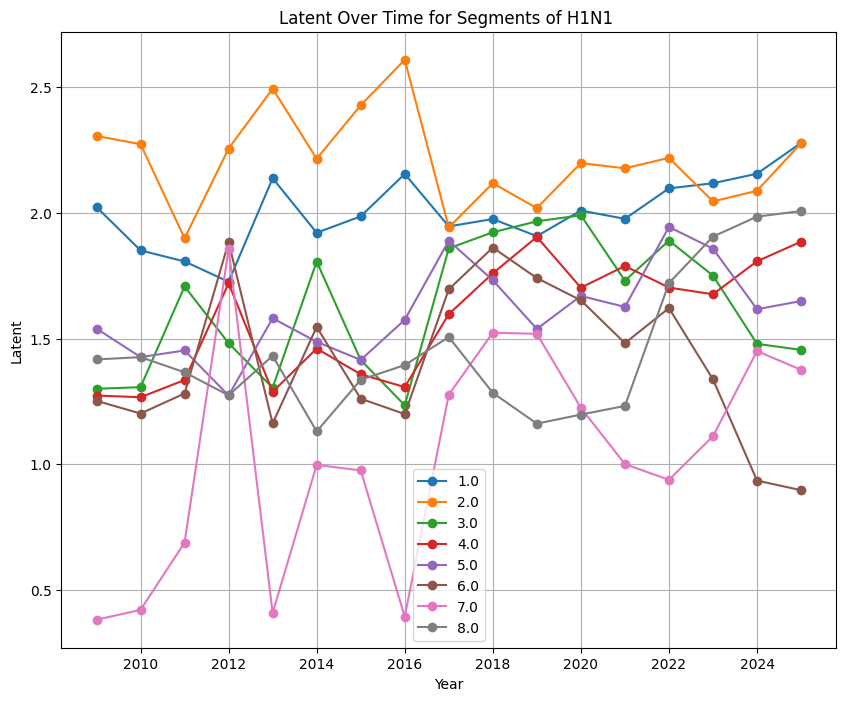

In [62]:

# Plotting path of latents over time for each segment  for years > 2000
plt.figure(figsize=(10, 8))
for segment in df1['Segment'].unique():
    segment_data = df1[df1['Segment'] == segment]
    segment_data = segment_data[segment_data.index >= 2009]


    plt.plot(segment_data.index, segment_data['latent'], marker='o', linestyle='-')


plt.title(f'Latent Over Time for Segments of H1N1 ')
plt.legend(df1['Segment'].unique())
plt.xlabel('Year')
plt.ylabel('Latent')
plt.grid(True)
plt.show()









